# Random Sample Generation and Probability Distributions

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt

In [145]:
import numpy as np

## Notations/Formulas from Probability & Statistics

Mean and Variance of a discrete random varaible $X$ whose probability is given by $p_i = P(X = x_i)$
$$
    \mathbb{E}[X] = \sum_i p(x_i) x_i \\
    \mathbb{E}[(X- \mu)^2] = \sum_i p(x_i) (x_i - \mu)^2
$$

## Gaussian Distribution

- PDF (Probability Density Function) is given by
$$
    p(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{-\frac{1}{2}\frac{(x-m)^2)}{\sigma^2}\bigg\}
$$
- CDF (Cumulative distribution function) is given by
$$
    Prob[X<x_0] = \int_{-\infty}^{x_0} p(x) dx
$$

In [153]:
mean = 0
std = 1
N = 100000

In [154]:
x = np.random.normal(mean, std, N)
x.shape, x[:10]

((100000,),
 array([-1.42504401, -1.12431122,  0.38956712,  0.49165884,  0.22147305,
        -0.30369542, -0.02035553, -0.28914962, -1.18340759, -0.99825457]))

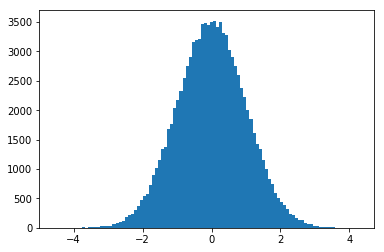

In [155]:
h = plt.hist (x, bins=100)

#### The frequency for the bins is recorded in h[0]

In [160]:
freq = h[0]
freq

array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
       1.000e+00, 3.000e+00, 4.000e+00, 8.000e+00, 1.000e+00, 6.000e+00,
       1.000e+01, 1.700e+01, 1.700e+01, 3.100e+01, 3.500e+01, 3.500e+01,
       3.900e+01, 6.000e+01, 8.700e+01, 9.700e+01, 1.180e+02, 1.790e+02,
       2.180e+02, 2.420e+02, 3.030e+02, 3.640e+02, 4.760e+02, 5.490e+02,
       5.730e+02, 7.320e+02, 8.980e+02, 1.012e+03, 1.151e+03, 1.343e+03,
       1.375e+03, 1.675e+03, 1.771e+03, 2.034e+03, 2.179e+03, 2.330e+03,
       2.540e+03, 2.753e+03, 2.902e+03, 3.167e+03, 3.193e+03, 3.205e+03,
       3.463e+03, 3.487e+03, 3.441e+03, 3.499e+03, 3.522e+03, 3.422e+03,
       3.500e+03, 3.320e+03, 3.272e+03, 3.027e+03, 2.913e+03, 2.745e+03,
       2.604e+03, 2.379e+03, 2.219e+03, 1.995e+03, 1.842e+03, 1.620e+03,
       1.431e+03, 1.340e+03, 1.160e+03, 9.960e+02, 8.250e+02, 7.490e+02,
       5.950e+02, 5.020e+02, 4.440e+02, 3.920e+02, 3.230e+02, 2.400e+02,
       2.100e+02, 1.690e+02, 1.330e+02, 1.300e+02, 

Text(0.5, 1.0, 'frequency plot (histogram)')

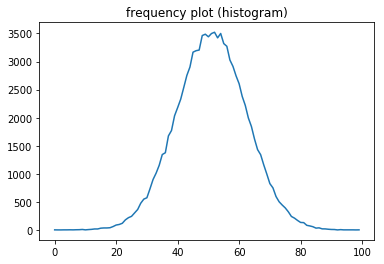

In [162]:
plt.plot (freq); plt.title ('frequency plot (histogram)')

### Cumulative Frequency Computation

In [163]:
cumfreq = np.zeros_like (freq)
cumfreq[0] = freq[0]
for i in range(1, cumfreq.size):
    cumfreq[i] = cumfreq[i-1] + freq[i]
cumfreq[-1] == N

True

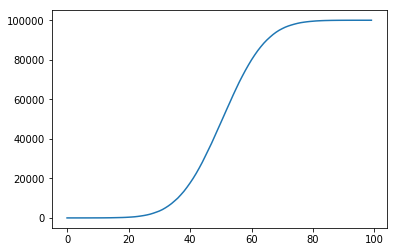

In [164]:
plt.plot (cumfreq)

In [165]:
normalized_cumfreq = cumfreq / N

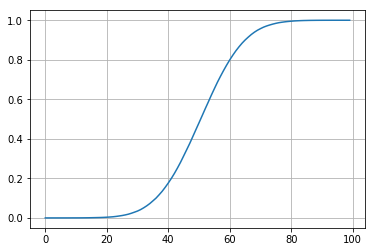

In [167]:
plt.plot (normalized_cumfreq)
plt.grid(True)

### Samples from the standard normal distribution can also be obtained by `np.random.randn(size)`

In [149]:
y = np.random.randn(N)
y.shape, y[:10]

((100000,),
 array([ 0.12505157,  0.45377894, -1.53453499, -0.03130102, -0.4491611 ,
        -0.1109742 , -0.04057554,  0.85825556,  0.01197899, -0.48751172]))

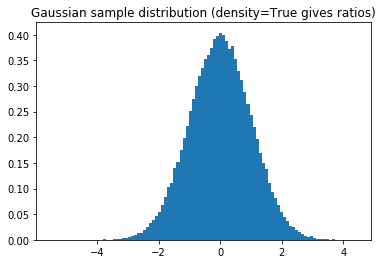

In [150]:
h = plt.hist (y, bins=100, density=True)
_ = plt.title ('Gaussian sample distribution (density=True gives ratios)')

In [190]:
def cumfreq(f):
    cdf = np.zeros_like (f)
    cdf[0] = f[0]
    for i in range(1, cdf.size):
        cdf[i] = cdf[i-1] + f[i]
    return cdf

## Random Integer Generation

In [191]:
xint = np.random.randint(0, high=1000, size=1000000)

Text(0.5, 1.0, 'histogram only')

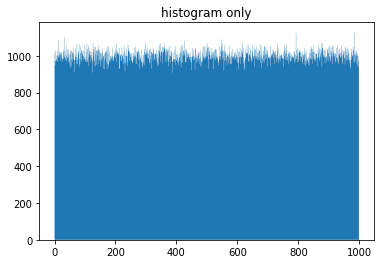

In [192]:
h = plt.hist(xint, bins=1000, histtype='stepfilled')
plt.title ('histogram only')

Text(0.5, 1.0, 'histogram normalized == sample density')

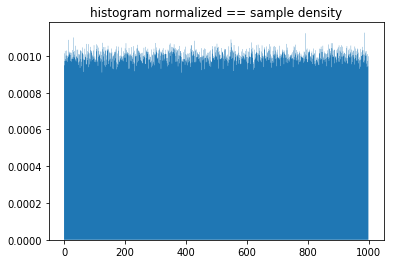

In [193]:
h = plt.hist(xint, bins=1000, histtype='stepfilled', density=True)
plt.title ('histogram normalized == sample density')

Text(0.5, 1.0, 'cdf of uniform integers [0,1000)')

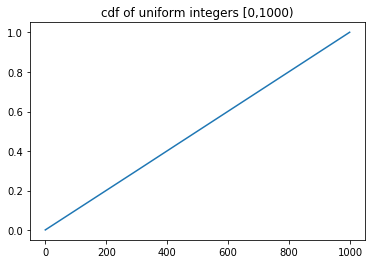

In [194]:
freq = h[0]
cdf = cumfreq (freq)
plt.plot (cdf)
plt.title ('cdf of uniform integers [0,1000)')

## Bernoulli Distribution
- https://en.wikipedia.org/wiki/Bernoulli_distribution

- Parameter
$$ Pr(X = 1) = p $$

- Probability Mass  Function (PMF) 
$$
   Pr(X = y) = p^y (1 - p)^{(1-y)}, \quad y \in \{ 0, 1 \}
$$

In [195]:
ntrial = 1
p = 0.3

# To examine the outpus
x = np.random.binomial(ntrial, p, 100)
x

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

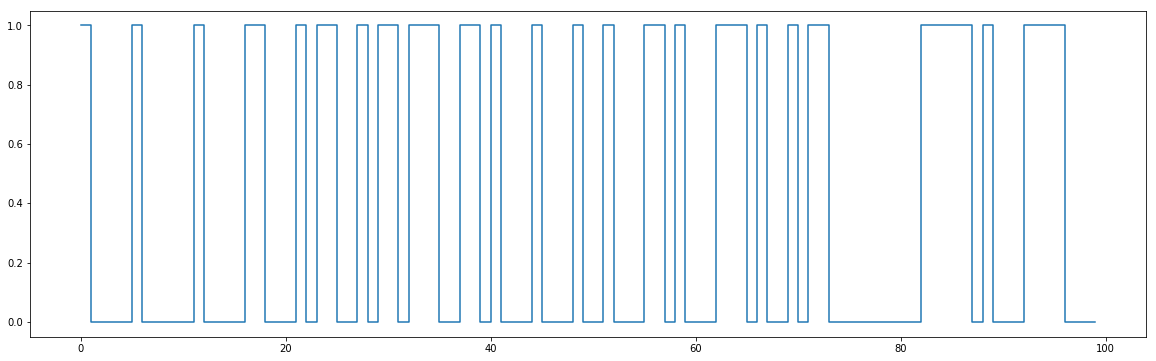

In [196]:
plt.figure(figsize=(20,6))
plt.plot (x, drawstyle='steps')

In [197]:
x = np.random.binomial (ntrial, p, 1000000)

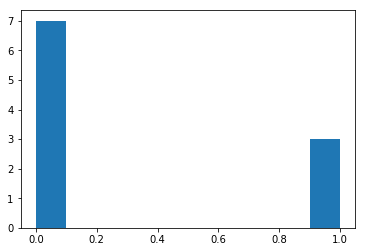

In [198]:
h = plt.hist (x, density=True)

In [199]:
h[0]

array([7.00503, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 2.99497])

## Binomial Distribution
- https://en.wikipedia.org/wiki/Binomial_distribution
    - In general, if the random variable X follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write $X \sim B(n, p)$.
    
- PMF
$$
    Pr(X = k) = {n \choose k} p^k (1-p)^{n-k}
$$

In [200]:
ntrial = 100
p = 0.3

xbino = np.random.binomial(n=ntrial, p=p, size=1000)

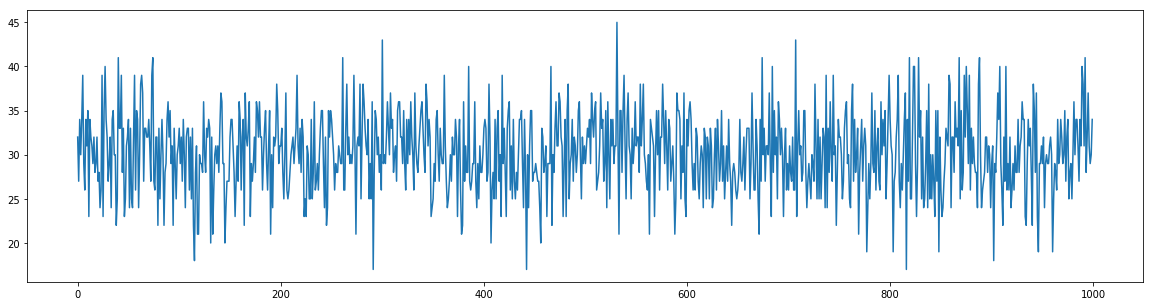

In [201]:
plt.figure (figsize=(20,5))
h = plt.plot (xbino)

In [202]:
# summary of the generated numbers
np.unique (xbino)

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 43, 45])

In [203]:
xbino = np.random.binomial (n=ntrial, p=p, size=1000000)

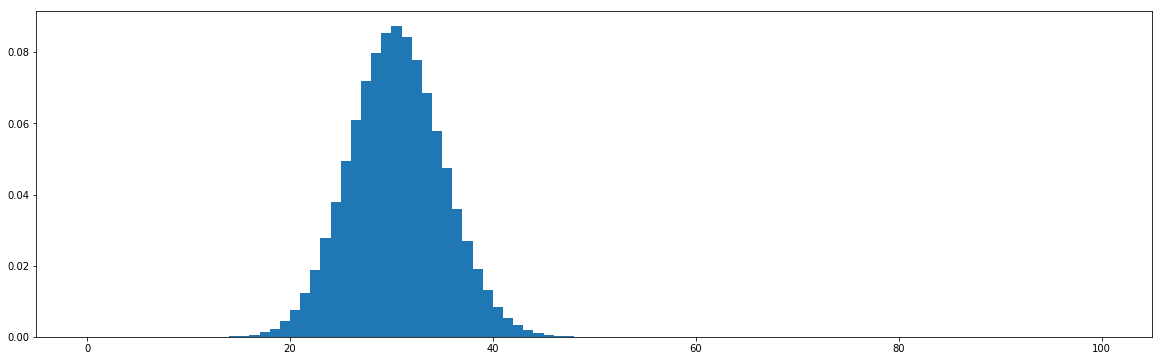

In [204]:
bins = [i for i in range(101)] # discrete bins

plt.figure (figsize=(20,6))
h = plt.hist (xbino, bins=bins, density=True, histtype='stepfilled')

<BarContainer object of 100 artists>

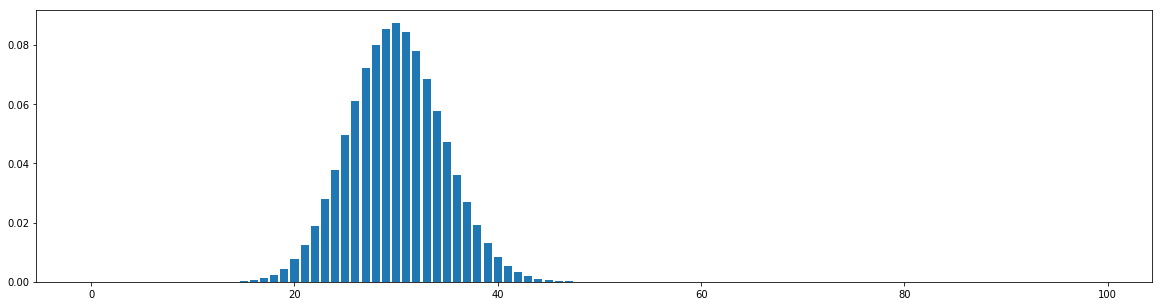

In [205]:
xcoord = [i for i in range(h[0].size)]

plt.figure (figsize=(20,5))
plt.bar (xcoord, h[0])

#### Sample CDF with `np.histogram()`

In [210]:
# range(xbino.min()-1, xbino.max()+2, 1)
bins = [i for i in range(xbino.min()-3, xbino.max()+5, 1)]

f, l = np.histogram (xbino, bins=bins)

In [207]:
f, l

(array([    0,     0,     0,     3,     4,    14,    46,    95,   250,
          552,  1227,  2289,  4406,  7573, 12317, 18824, 27875, 37788,
        49491, 60850, 71998, 79774, 85372, 87362, 84303, 77921, 68575,
        57758, 47345, 36040, 26849, 19104, 13079,  8392,  5298,  3190,
         1872,  1060,   542,   312,   147,    53,    28,    14,     4,
            3,     0,     1,     0,     0,     0]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58]))

In [208]:
cdf = cumfreq (f)
cdf

array([      0,       0,       0,       3,       7,      21,      67,
           162,     412,     964,    2191,    4480,    8886,   16459,
         28776,   47600,   75475,  113263,  162754,  223604,  295602,
        375376,  460748,  548110,  632413,  710334,  778909,  836667,
        884012,  920052,  946901,  966005,  979084,  987476,  992774,
        995964,  997836,  998896,  999438,  999750,  999897,  999950,
        999978,  999992,  999996,  999999,  999999, 1000000, 1000000,
       1000000, 1000000])

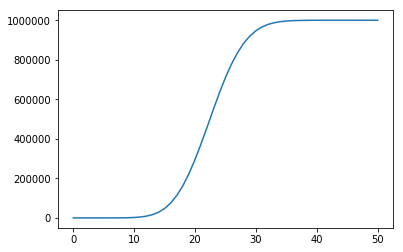

In [209]:
h= plt.plot (cdf)

## END